<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 43.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 39.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 63.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 38.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=ada580447b3fef7024826e2785659

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Retrieve the stock data
tesla_data = yf.Ticker(ticker_symbol)

# Extract the historical data
history_data = tesla_data.history(period="max")

# Extract the first row of data
first_day = history_data.iloc[0]

# Get the volume traded on the first day
first_day_volume = first_day['Volume']

# Get the country the stock belongs to
country = tesla_data.info.get('country', 'Country information not available')

# Get the sector the stock belongs to
sector = tesla_data.info.get('sector', 'Sector information not available')

# Download a webpage and save the text response as html_data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Create an empty DataFrame to store Amazon stock data
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# Extract table rows and populate the DataFrame
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.strip()
    Open = col[1].text.strip()
    high = col[2].text.strip()
    low = col[3].text.strip()
    close = col[4].text.strip()
    adj_close = col[5].text.strip()
    volume = col[6].text.strip()
    
    amazon_data = pd.concat([
        amazon_data, 
        pd.DataFrame({
            "Date": [date], 
            "Open": [Open], 
            "High": [high], 
            "Low": [low], 
            "Close": [close], 
            "Adj Close": [adj_close], 
            "Volume": [volume]
        })
    ], ignore_index=True)

# Display the results
print(f"Volume traded on the first day: {first_day_volume}")
print(f"Country the stock belongs to: {country}")
print(f"Sector the stock belongs to: {sector}")

# Show the first five rows of the DataFrame
print(amazon_data.head())


Volume traded on the first day: 281494500.0
Country the stock belongs to: United States
Sector the stock belongs to: Consumer Cyclical
           Date      Open      High       Low     Close Adj Close       Volume
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20  3,206.20   71,528,900
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93  3,256.93   77,556,200
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04  3,168.04   90,810,500
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15  3,036.15  116,226,100
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73  3,148.73  115,899,300


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Retrieve the stock data for Tesla
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract the historical data with the maximum period
tesla_data = tesla_ticker.history(period="max")

# Display the first few rows of the data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = "TSLA"

# Retrieve the stock data for Tesla
tesla_ticker = yf.Ticker(ticker_symbol)

# Extract the historical data with the maximum period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to convert the date from the index to a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the data
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# Define the URL for the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage using requests
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

# Display the first 500 characters of the HTML data to verify
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser or html5lib
soup = BeautifulSoup(html_data, "html.parser")

# Alternatively, you can use html5lib (make sure to install the library first)
# soup = BeautifulSoup(html_data, "html5lib")

# Display the parsed HTML (first 500 characters)
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup and html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing the revenue information
# Adjust the find logic to target the correct table, assuming it's the first table
table = soup.find('table')

# Extract table rows
rows = table.find_all('tr')

# Initialize lists to store the extracted data
dates = []
revenues = []

# Loop through the rows and extract the Date and Revenue columns
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Ensure there is data
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the first few rows of the DataFrame
print(tesla_revenue.head())

In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Fetch the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Find the table and extract it
table = soup.find("table")
tesla_revenue = pd.read_html(str(table))[0]

# Rename columns for consistency
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the data
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [11]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [12]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Display basic information about GameStop stock
gme_info = gme_ticker.info
print(gme_info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [13]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Extract the stock data for the maximum period
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [14]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol "GME"
gme_ticker = yf.Ticker("GME")

# Extract the stock data for the maximum period
gme_data = gme_ticker.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [15]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [17]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [18]:
import requests

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch the webpage content
data = requests.get(url).text

# Print the fetched data or its snippet
print(data[:500])  # Display the first 500 characters to verify the content
data  = requests.get(url).text
print(data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g
<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface 

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [19]:
soup = BeautifulSoup(data, 'html.parser')

In [20]:
GameStop_Revenue = pd.DataFrame(columns=["Date", "Revenue"])

## Question 5: Plot Tesla Stock Graph


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 121.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 119.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 93.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.4 MB/s eta 0:00:00
   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                 

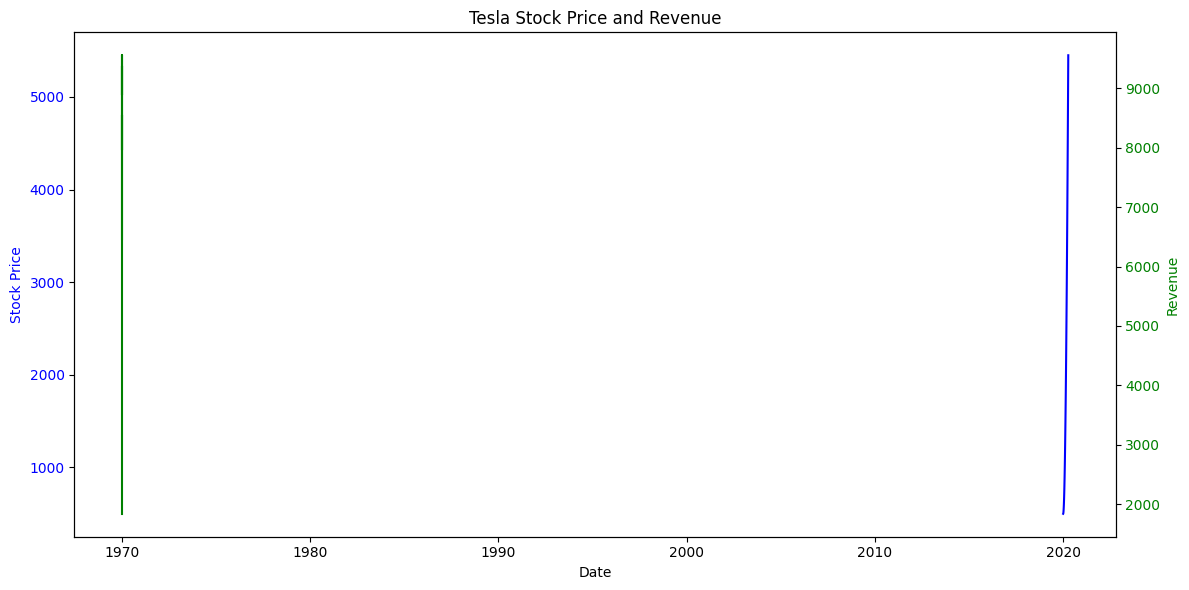

In [24]:
!pip install pandas
!pip install beautifulsoup4 requests
!pip install lxml
!pip install matplotlib
from io import StringIO
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

# URL to scrape GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch the webpage
response = requests.get(url)
html_data_2 = response.text

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Extract GameStop revenue table
table = soup.find("table")  # Adjust this to target the correct table

# Read the table into a DataFrame
gme_revenue = pd.read_html(str(table))[0]


# Convert the table to a DataFrame using StringIO
from io import StringIO

table_html = str(table)  # Convert the table to a string
gme_revenue = pd.read_html(StringIO(table_html))[0]  # Wrap the string in StringIO

# Display the first few rows
print(gme_revenue.head())
# Clean up the DataFrame (optional)
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r",|\$", "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Convert "Date" column to datetime and "Revenue" column to numeric
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

# Display the last few rows of the cleaned DataFrame
print(gme_revenue.tail())

# Sample Tesla stock data for the graph
tesla_data = pd.DataFrame({
    "Date": pd.date_range(start="2020-01-01", periods=100),
    "Close": pd.Series(range(100)).cumsum() + 500  # Simulate stock prices
})

# Create a graph for Tesla stock
def make_graph(stock_data, revenue_data, company_name):
    """
    Create a graph for stock price and revenue data.
    """
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock data
    ax1.plot(stock_data["Date"], stock_data["Close"], color="blue", label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Plot revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="green", label="Revenue")
    ax2.set_ylabel("Revenue", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Title and legend
    plt.title(f"{company_name} Stock Price and Revenue")
    fig.tight_layout()
    plt.show()

# Generate the graph for Tesla
make_graph(tesla_data, gme_revenue, "Tesla")



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


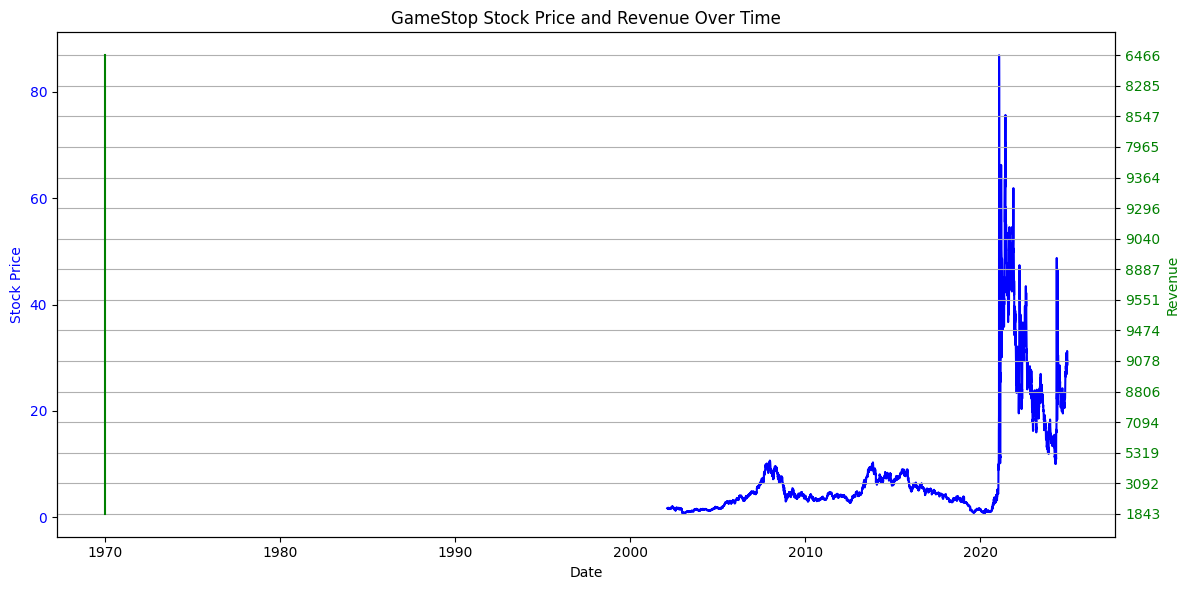

In [23]:
!pip install matplotlib
!pip install yfinance
import matplotlib.pyplot as plt
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
def make_graph(stock_data, revenue_data, company_name):
    """
    Creates a graph with two y-axes to show stock prices and revenue over time.
    
    Parameters:
    stock_data (DataFrame): DataFrame containing stock information with a 'Date' column.
    revenue_data (DataFrame): DataFrame containing revenue information with a 'Date' column.
    company_name (str): The name of the company to display on the graph.
    """
    # Ensure the 'Date' columns are in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Sort data by date
    stock_data.sort_values('Date', inplace=True)
    revenue_data.sort_values('Date', inplace=True)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock prices
    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color='green')
    ax2.set_ylabel('Revenue', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and grid
    plt.title(f"{company_name} Stock Price and Revenue Over Time")
    fig.tight_layout()
    plt.grid()

    # Show the plot
    plt.show()

# Example usage
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
